C:\Users\sirig\AppData\Local\Temp\ipykernel_9920\489736886.py:13: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, encoding='latin1')


First 5 rows of the dataset:
  stn_code       sampling_date           state   location agency  \
0    150.0  February - M021990  Andhra Pradesh  Hyderabad    NaN   
1    151.0  February - M021990  Andhra Pradesh  Hyderabad    NaN   
2    152.0  February - M021990  Andhra Pradesh  Hyderabad    NaN   
3    150.0     March - M031990  Andhra Pradesh  Hyderabad    NaN   
4    151.0     March - M031990  Andhra Pradesh  Hyderabad    NaN   

                                 type  so2   no2  rspm  spm  \
0  Residential, Rural and other Areas  4.8  17.4   NaN  NaN   
1                     Industrial Area  3.1   7.0   NaN  NaN   
2  Residential, Rural and other Areas  6.2  28.5   NaN  NaN   
3  Residential, Rural and other Areas  6.3  14.7   NaN  NaN   
4                     Industrial Area  4.7   7.5   NaN  NaN   

  location_monitoring_station  pm2_5        date  
0                         NaN    NaN  1990-02-01  
1                         NaN    NaN  1990-02-01  
2                         NaN 

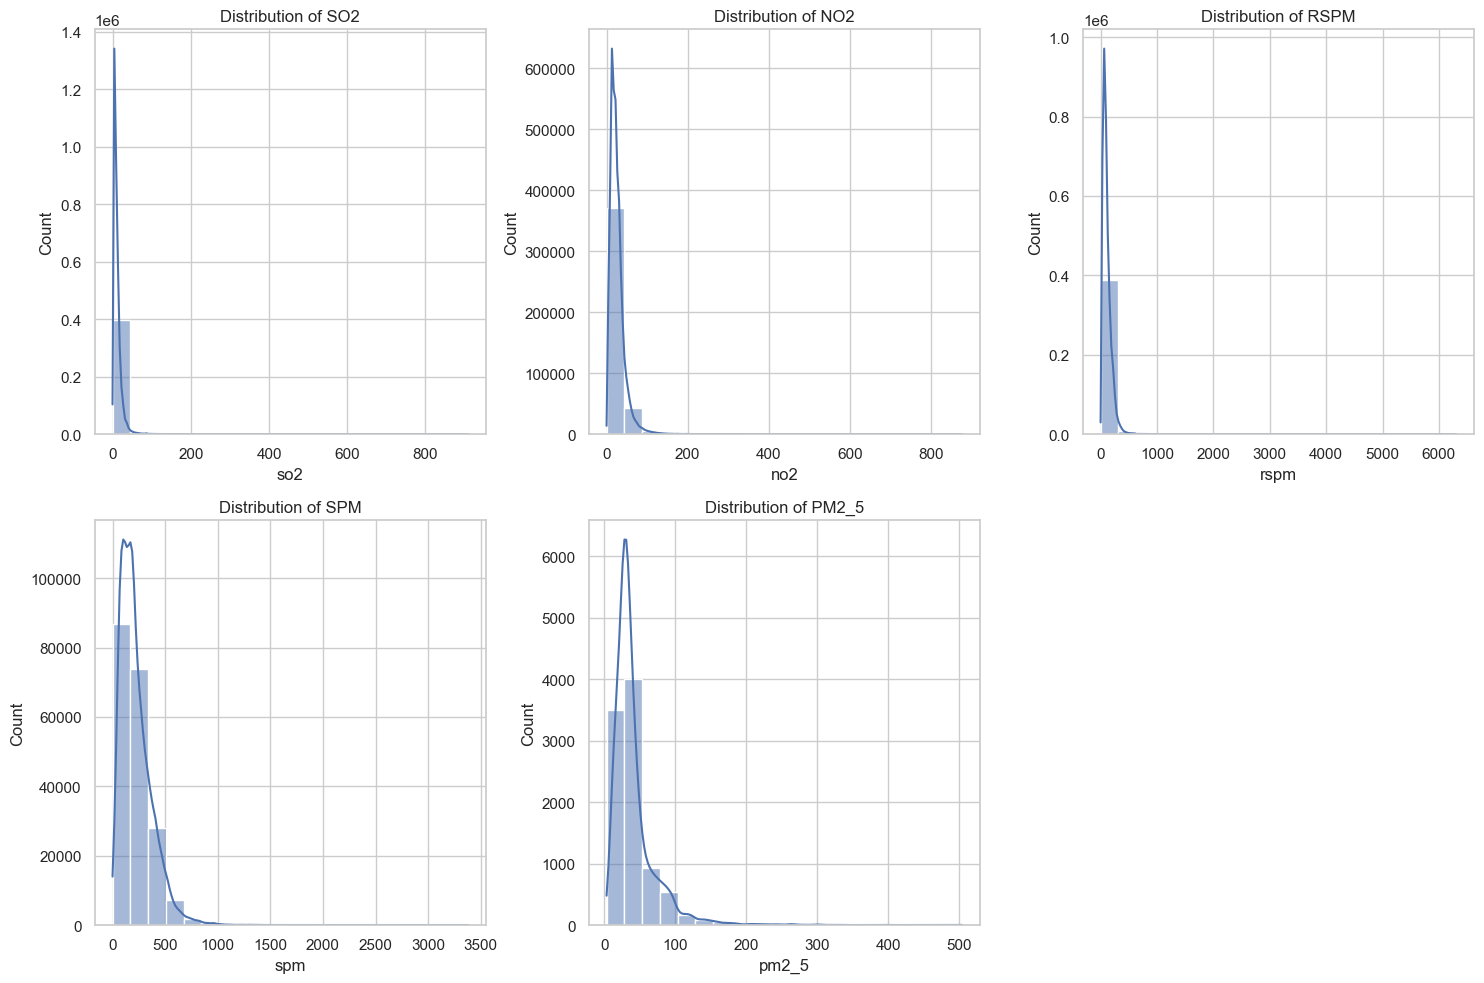

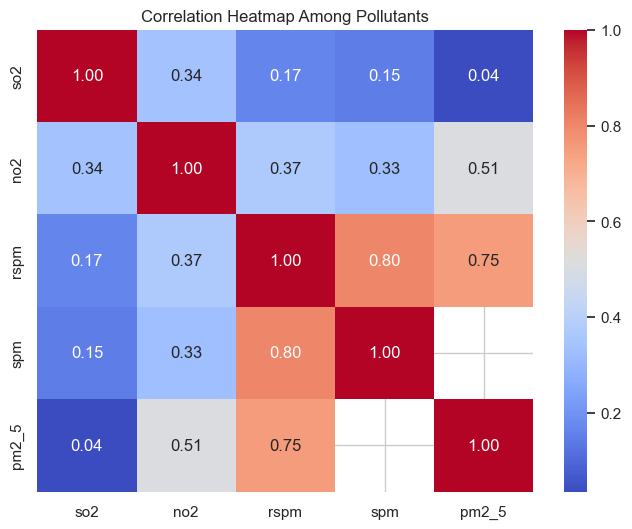

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for plots
sns.set(style="whitegrid")

# Path to your CSV file
file_path = r"C:\mmd assign\Multimodal-Data-Collection\India_with_data\processed\data.csv"



df = pd.read_csv(file_path, encoding='latin1')

# Display the first few rows
print("First 5 rows of the dataset:")
print(df.head())

# Show basic info and descriptive statistics (including non-numeric columns)
print("\nDataFrame Info:")
print(df.info())
print("\nDescriptive Statistics:")
print(df.describe(include='all'))

# Count missing values for each column
print("\nMissing Values Count:")
print(df.isna().sum())

# Convert the 'date' column to datetime (using 'date' column as it is in proper format)
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Convert pollutant columns to numeric
pollutant_cols = ['so2', 'no2', 'rspm', 'spm', 'pm2_5']
for col in pollutant_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Check the conversion result
print("\nData types after converting pollutant columns:")
print(df.dtypes)

# --- Plot 1: Histograms with KDE for pollutant distributions ---
plt.figure(figsize=(15, 10))
for i, col in enumerate(pollutant_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col].dropna(), kde=True, bins=20)
    plt.title(f"Distribution of {col.upper()}")
plt.tight_layout()
plt.show()

# --- Plot 2: Correlation Heatmap among pollutant variables ---
plt.figure(figsize=(8, 6))
corr = df[pollutant_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap Among Pollutants")
plt.show()




Average pollutant levels by state:
                          state        so2        no2        rspm         spm  \
0                Andhra Pradesh   7.284845  21.704451   78.182824  200.260378   
1             Arunachal Pradesh   3.179104   5.469697   76.629213         NaN   
2                         Assam   6.723263  14.793691   93.724912  153.355386   
3                         Bihar  19.381476  36.575525  123.705176  276.917416   
4                    Chandigarh   2.676986  18.619404   96.587079  206.056150   
5                  Chhattisgarh  12.846609  24.815961  126.472399  231.290969   
6          Dadra & Nagar Haveli   8.939587  18.293959   76.536530  170.545024   
7                   Daman & Diu   8.192958  16.168926   73.749431  145.681416   
8                         Delhi   8.737273  53.489147  196.639771  399.402088   
9                           Goa   6.827913  12.506337   61.212766   67.254193   
10                      Gujarat  16.656343  24.065631   98.244510  191.56

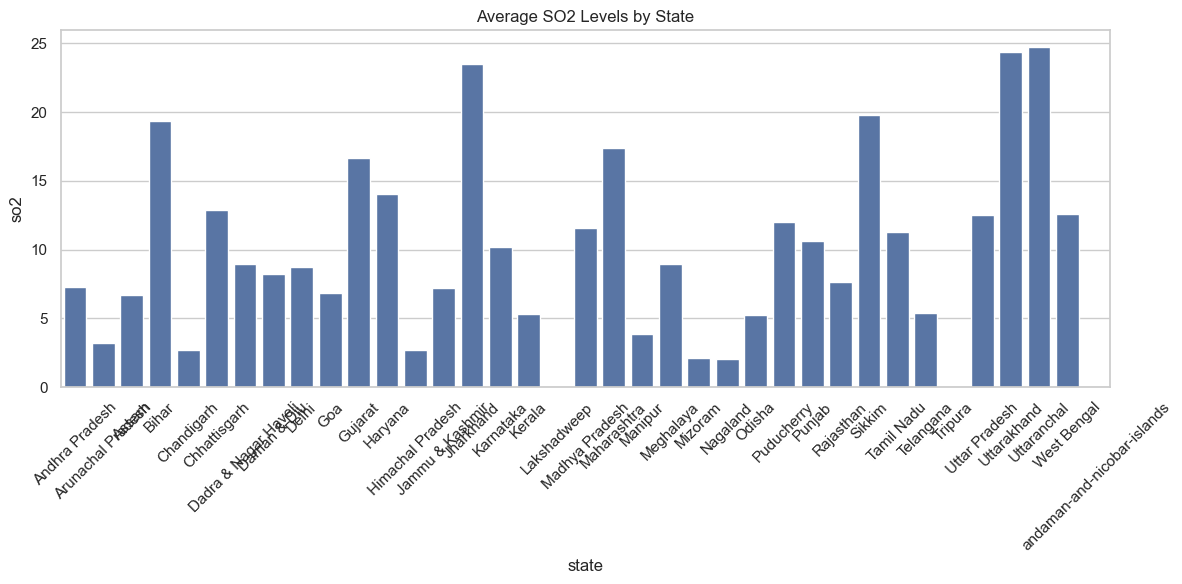

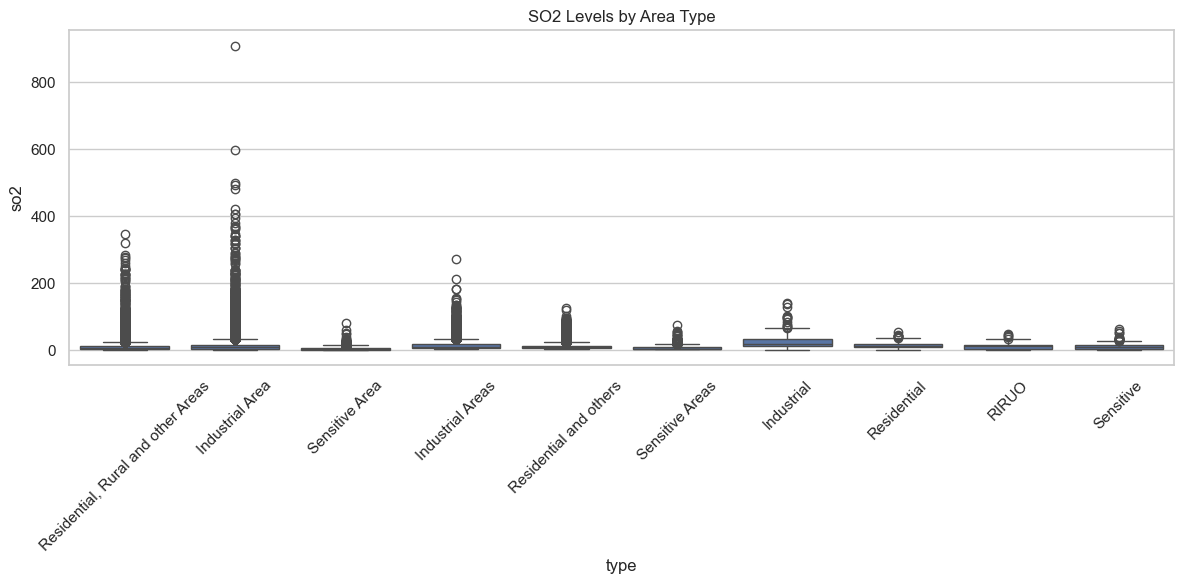

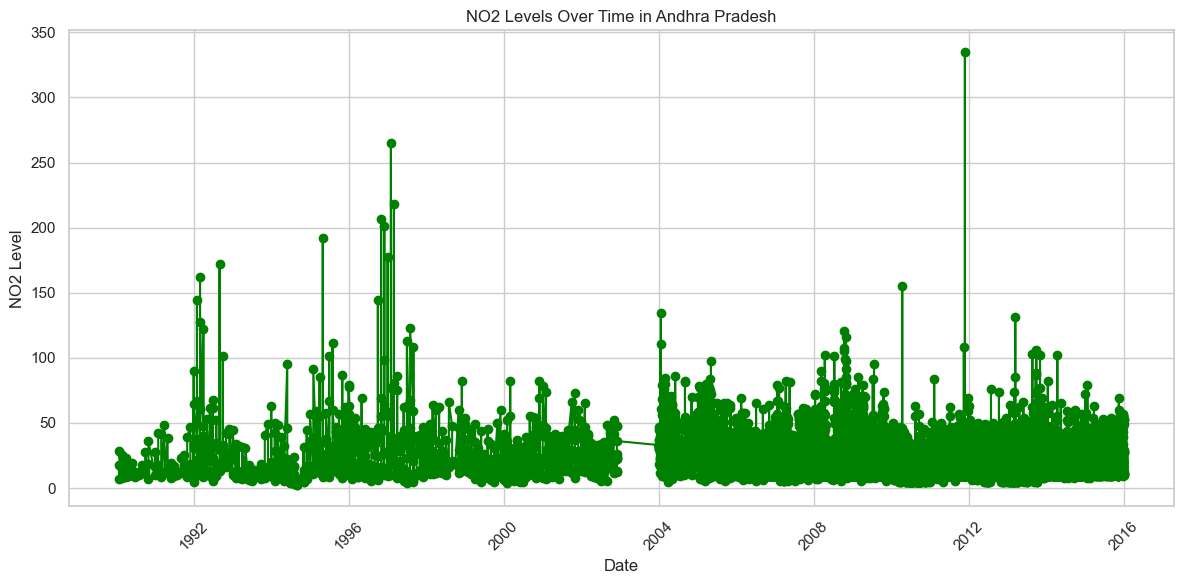

In [3]:
# --- Plot 3: Average pollutant levels by state ---
avg_by_state = df.groupby('state')[pollutant_cols].mean().reset_index()
print("\nAverage pollutant levels by state:")
print(avg_by_state)

plt.figure(figsize=(12, 6))
sns.barplot(data=avg_by_state, x='state', y='so2')
plt.xticks(rotation=45)
plt.title("Average SO2 Levels by State")
plt.tight_layout()
plt.show()

# --- Plot 4: Box Plot of SO2 levels by 'type' of area ---
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='type', y='so2')
plt.xticks(rotation=45)
plt.title("SO2 Levels by Area Type")
plt.tight_layout()
plt.show()

# --- Plot 5: Time Series of NO2 (if there are enough dates) for a given state ---
# Filter for one state (e.g., Andhra Pradesh) and sort by date
state_data = df[df['state'] == 'Andhra Pradesh'].dropna(subset=['no2'])
state_data = state_data.sort_values(by='date')

plt.figure(figsize=(12, 6))
plt.plot(state_data['date'], state_data['no2'], marker='o', linestyle='-', color='green')
plt.title("NO2 Levels Over Time in Andhra Pradesh")
plt.xlabel("Date")
plt.ylabel("NO2 Level")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
